# 확률적 경사 하강법

## SGDClassifier

In [18]:
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
# from scipy.special import softmax
# from scipy.special import expit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [9]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [11]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [13]:
# SGD: Stochastic Gradient Descent

sc = SGDClassifier(loss ='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


- 'hinge': 서포트 벡터 머신(SVM)에서 사용하는 손실 함수, 이진 분류.
- 'log'/'log_loss': 로지스틱 회귀, 확률 기반 예측 (이진/다중 클래스 분류).
- 'perceptron': 퍼셉트론 알고리즘, 간단한 선형 분류.
- 'squared_hinge': 제곱 힌지 손실, SVM 강화.
- 'modified_huber': 허브 손실을 변형한 것으로, robust한 성질을 가짐.
- 'kullback_leibler': 확률 분포 간의 차이를 측정.
- 'squared_error': 회귀 문제에서 사용되는 손실 함수.


손실 함수(loss function)
- 모델이 예측한 값과 실제 정답 간의 차이를 수치적으로 나타내는 함수
- 모델이 얼마나 잘못 예측했는지 또는 얼마나 잘 예측했는지를 계산하는 평가지표입니다. 
- 손실 함수의 값은 오차를 측정

In [15]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대/과소 적합

### 요약
| 개념             | 배치 (Batch)                                  | 에포크 (Epoch)                               |
|------------------|-----------------------------------------------|--------------------------------------------|
| **설명**         | 한 번에 처리할 훈련 데이터의 **양** (배치 크기)      | 훈련 데이터셋을 **몇 번 반복**할 것인지의 횟수         |
| **학습**         | 한 번에 처리할 데이터 수 (배치 크기만큼 처리)           | 전체 데이터셋을 **반복하여 학습**하는 횟수             |
| **업데이트**     | 배치마다 **한 번**의 모델 업데이트                | 에포크마다 **전체 데이터**를 한 번 학습하고 모델을 업데이트 |
| **예시**         | 배치 크기 100: 한 번에 100개씩 처리                | 10 에포크: 전체 데이터를 10번 반복하여 학습         |

In [20]:
sc = SGDClassifier(loss ='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [22]:
for _ in range(0, 300):
    # partial_fit() :  데이터를 한 번에 모두 학습하는 것이 아니라 점진적으로 학습
    # 이 함수는 미니배치 학습(mini-batch learning)을 지원
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

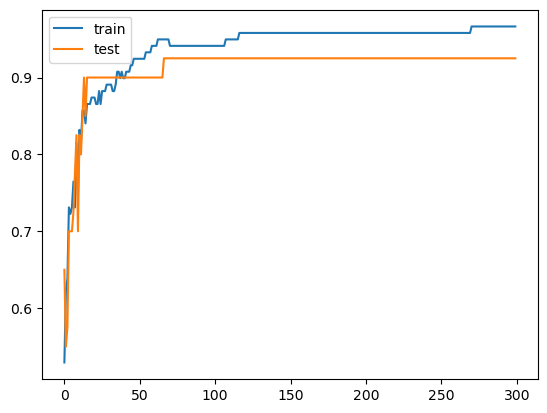

In [43]:
plt.plot(train_score, label = "train")
plt.plot(test_score, label = "test")
plt.legend()
plt.show()

In [26]:
sc = SGDClassifier(loss ='log_loss', max_iter=100, tol= None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [28]:
sc = SGDClassifier(loss ='hinge', max_iter=100, tol= None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


| **항목**              | **코드 1 (`log_loss`, `max_iter=10`, `partial_fit`)**  | **코드 2 (`log_loss`, `max_iter=100`, `tol=None`)** | **코드 3 (`hinge`, `max_iter=100`, `tol=None`)**  |
|-----------------------|-------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **손실 함수 (loss)**    | `log_loss` (로지스틱 회귀)                             | `log_loss` (로지스틱 회귀)                         | `hinge` (서포트 벡터 머신)                        |
| **최대 반복 횟수**      | 10                                                    | 100                                               | 100                                              |
| **수렴 기준 (`tol`)**   | 없음 (학습을 10번만 진행)                              | 없음 (수렴 기준 없음)                             | 없음 (수렴 기준 없음)                            |
| **학습 방법**          | 한 번 학습 후 `partial_fit`으로 점진적 학습             | 전체 데이터를 한 번에 학습                         | 전체 데이터를 한 번에 학습                        |
| **모델 특성**           | **확률적 예측**을 목표로 학습 (로지스틱 회귀)            | **확률적 예측**을 목표로 학습 (로지스틱 회귀)        | **결정 경계**를 최대화하려는 학습 (SVM)            |
